<h3>Environment Setup</h3>

In [1]:
# Package installs
#pip install scikit-image
#pip install kagglehub

In [2]:
# Convert to binary image
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as pltd

# Retrieve data
import kagglehub

# CCA
from skimage import measure
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
# Download data
# path = kagglehub.dataset_download("fareselmenshawii/large-license-plate-dataset")
# print("Path to dataset files:", path)

In [4]:
# Import example image in both color and grayscale
example_image_gray = imread("data/images/test/f5c2a80a21ddb78c.jpg", as_gray=True)
example_image_color = imread("data/images/test/f5c2a80a21ddb78c.jpg")

<h3>Convert to binary image</h3>
<h6><a href="https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_thresholding.html">More on thresholding</a></h6>

Threshold value: 0.509765625


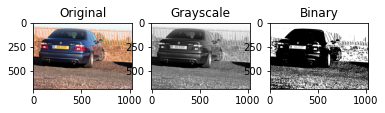

In [5]:
# Create figure with subplots for images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Show original image (color version)
ax1.imshow(example_image_color)
ax1.set_title("Original")

# Show grayscale version of image
ax2.imshow(example_image_gray, cmap="gray")
ax2.set_title("Grayscale")

# Define threshold for maximizing variance
threshold_value = threshold_otsu(example_image_gray)
print("Threshold value:" ,threshold_value)

# Show binary (thresholded) version of image
binary_image = example_image_gray > threshold_value
ax3.imshow(binary_image, cmap="gray")
ax3.set_title("Binary")

plt.show()

<h3>Label regions and draw borders</h3>

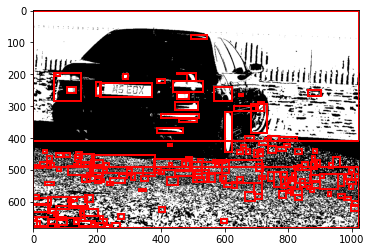

In [46]:
# Label connected regions using skimage.measure
labeled_image = measure.label(binary_image)

# Create figure
fig, (ax1) = plt.subplots(1)
ax1.imshow(binary_image, cmap="gray")

# Add red lines to visually highlight connected regions
for region in regionprops(labeled_image):
    # Exclude small regions
    if region.area < 50:
        continue
    
    # Separate box dimensions into variables
    minRow, minCol, maxRow, maxCol = region.bbox
    # Create rectangle shape given region dimensions
    rectBorder = patches.Rectangle((minCol, minRow), maxCol-minCol, maxRow-minRow, edgecolor="red", linewidth=2, fill=False)
    # Add to figure
    ax1.add_patch(rectBorder)

plt.show()

<h3>Add region constraints to filter for plates</h3>

<h4>Limiting Properties</h4>
<ol>
    <li>Rectangular in shape</li>
    <li>Width > Height</li>
    <li>Plate width is 15-40% of the relative width</li>
    <li>Plate height is 8-20% of the relative height</li>
</ol>

In [41]:
# Constraint variables
MIN_REL_HEIGHT = 0.08
MAX_REL_HEIGHT = 0.20
MIN_REL_WIDTH = 0.15
MAX_REL_WIDTH = 0.40

# Label connected regions using skimage.measure
labeled_image = measure.label(binary_image)

img_height = labeled_image.shape[0]
img_width = labeled_image.shape[1]

min_width = MIN_REL_WIDTH * img_width
max_width = MAX_REL_WIDTH * img_width
min_height = MIN_REL_HEIGHT * img_height
max_height = MAX_REL_HEIGHT * img_height

plate_dimensions = min_height, max_height, min_width, max_width

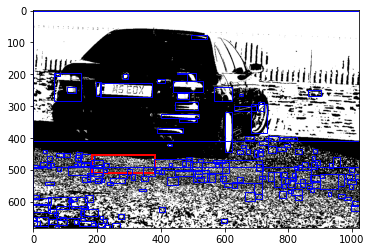

In [77]:
plate_like_objects = []
plate_object_coords = []


# Create figure
fig, (ax1) = plt.subplots(1)
ax1.imshow(binary_image, cmap="gray")

# Add red lines to visually highlight connected regions
for region in regionprops(labeled_image):
    # Exclude small regions
    if region.area < 50:
        continue
    
    # Separate box dimensions into variables
    minRow, minCol, maxRow, maxCol = region.bbox
    region_height = maxRow - minRow
    region_width = maxCol - minCol
    
    # Filter with dimension constraints for possible matches
    if (
        region_height >= min_height and region_height <= max_height
        and region_width >= min_width and region_width <= max_width
        and region_width > region_height
       ):
        plate_like_objects.append(
            binary_image[minRow:maxRow, minCol:maxCol]
        )
        plate_object_coords.append((minRow, minCol, maxRow, maxCol))
    
    
        # Create rectangle shape given region dimensions
        rectBorder = patches.Rectangle((minCol, minRow), maxCol-minCol, maxRow-minRow, edgecolor="red", linewidth=2, fill=False)
        # Add to figure
        ax1.add_patch(rectBorder)
    else:
        # Create rectangle shape given region dimensions
        rectBorder = patches.Rectangle((minCol, minRow), maxCol-minCol, maxRow-minRow, edgecolor="blue", linewidth=1, fill=False)
        # Add to figure
        ax1.add_patch(rectBorder)
    
plt.show()
